<a href="https://colab.research.google.com/github/eclemente27/eclemente-data2000/blob/main/Clemente_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA-2000 Midterm Exam

## Recipe Rating Prediction

For this exercise, we are going to use a dataset of recipes and their ratings, taken from [the website Epicurious](https://www.epicurious.com/recipes-menus).

Our dataset contains basic information about the dish (its name, description, ingredients, and directions), as well as nutritional content (calories, protein, sodium, and fat contents). Based on this information, we want to try and predict how well or poorly the dish will be rated by users.


## Grading Rubric

This midterm will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Data Prep: 10 points
    - 5 points will be awarded for the actual data cleaning (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale for the data quality checks that you chose to use
  - Feature Engineering: 12 points
    - 2 points will be awarded by default, but may be subtracted from if there are substantial errors in your data prep that reduce the quality of your engineered features
    - 5 points will be awarded for the actual feature engineering (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Building: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your feature engineering that reduce the quality of your model
    - 5 points will be awarded for the actual model building (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 5 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not


## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [121]:
import pandas as pd

data = pd.read_json('https://cdn.c18l.org/full_format_recipes.json')

In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [123]:
import re
import numpy as np

data['directions'] = data['directions'].replace(np.nan,'')
data['mins'] = data['directions'].apply(
    lambda x: [
        re.search(r'([0-9]{1,2} (?:min|hour))', elem)
        for elem in x
    ]
).apply(
    lambda x: [
        elem.group() for elem in x if elem is not None
    ]
)
data['mins'] = data['mins'].apply(
    lambda x: [elem.split() for elem in x]
)
data['mins'] = data['mins'].apply(
    lambda x: sum([
        int(elem[0]) if elem[1] == "min"
        else int(elem[0])*60
        for elem in x

    ])
)

In [124]:
data.head() #looking at what the data all contains

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,mins
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,30
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,173
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,10
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,13
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,45


## Data Prep & Cleaning

Perform any data quality checks and data cleaning that you believe is appropriate. Convert any categorical columns to numeric ones, if needed. Provide a narrative explanation of your choices to accompany any code.

In [125]:
#getting rid of the time that the recipe was posted, this will make it easier to organize the data by date without the time

import pandas as pd
data['date'] = pd.to_datetime(data['date']).dt.date

In [126]:
#selecting fewer columns and selecting variables that I think could best predict the rating of the recipe
#and reorganizing the order of columns to make it more meaningful with importance of information

new_data = data.loc[:,["title", "date", "categories", "rating", "fat", "protein", "sodium", "calories", "mins"]]


In [127]:
new_data.head()

,title,date,categories,rating,fat,protein,sodium,calories,mins
0,"Lentil, Apple, and Turkey Wrap",2006-09-01,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2.500,7.0,30.0,559.0,426.0,30
1,Boudin Blanc Terrine with Red Onion Confit,2004-08-20,"[Food Processor, Onion, Pork, Bake, Bastille D...",4.375,23.0,18.0,1439.0,403.0,173
2,Potato and Fennel Soup Hodge,2004-08-20,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",3.750,7.0,6.0,165.0,165.0,10
3,Mahi-Mahi in Tomato Olive Sauce,2009-03-27,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",5.000,NaN,NaN,NaN,NaN,13
4,Spinach Noodle Casserole,2004-08-20,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",3.125,32.0,20.0,452.0,547.0,45


## Feature Engineering

Develop any new feature(s) that you feel may be relevant to a model. Provide a narrative explanation of your choices to accompany any code.

To help, I've included a `column_builder()` utility function that will create a new boolean column based on whether a string of text appears in any of (1) the recipe title; (2) the recipe description; or (3) the recipe tags.

In [128]:
def column_builder(category: str, dataset: pd.DataFrame) -> pd.DataFrame:
    dataset[f'is_{category}'] = ((
        dataset['categories'].str.contains(f'{category}', na=False, case=False)
    ) | (
        dataset['title'].str.contains(f'{category}', na=False, case=False)
    ) | (
        dataset['desc'].str.contains(f'{category}', na=False, case=False)
    )).astype(int)

    return dataset

#creating categories if the categories, title, or description contains these words
categories = [
    'easy',
    'breakfast'
    # Add any additional keywords here
]

for category in categories:
    new_data = column_builder(category, data)

new_data['is_easy'].describe()

count    20130.000000
mean         0.023746
std          0.152259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_easy, dtype: float64

In [129]:
#adding a column with a boolean expression using fat and protein to determine if a recipe is healthy or not

new_data['healthy'] = (new_data['fat'] < 15) & (new_data['protein'] > 10).astype(int)

In [130]:
new_data.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,mins,is_easy,is_breakfast,healthy
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,30,0,0,True
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,173,0,0,False
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,10,0,0,False
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,13,0,0,False
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,45,0,0,False


In [131]:
#adding a column to show if a recipe is not dairy free by looking to see if the categories column contains dairy ingredients
new_data['not_dairy_free'] = new_data["categories"].str.contains == 'milk' or 'cheese' or 'dairy' or 'yogurt' or 'cream'

new_data['not_dairy_free'].describe()

count      20130
unique         1
top       cheese
freq       20130
Name: not_dairy_free, dtype: object

In [132]:
#changing healthy variable to a number to be able to use it nicely in a prediction format
#0 is true that it is healthy, 1 is false that it is not healthy

is_healthy = {val: idx for idx, val in enumerate(data['healthy'].unique())}

data['healthy'] = data['healthy'].replace(is_healthy)

In [133]:
new_data = new_data.loc[:,["title", "date", "fat","rating", "protein", "sodium", "calories", "is_easy", "mins"]]

new_data = new_data.dropna( axis = 0)

In [134]:
new_data = new_data[new_data['mins'] < 60]
new_data = new_data[new_data['calories'] < 800]

In [135]:
new_data.describe()

,fat,rating,protein,sodium,calories,is_easy,mins
count,9814.000000,9814.000000,9814.000000,9814.000000,9814.000000,9814.000000,9814.000000
mean,16.783371,3.673833,12.614530,505.244243,318.913593,0.022519,15.035867
std,14.230246,1.352279,14.887009,2513.095365,190.301879,0.148371,15.285647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.750000,2.000000,57.000000,174.250000,0.000000,2.000000
50%,14.000000,4.375000,6.000000,240.000000,279.000000,0.000000,10.000000
75%,24.000000,4.375000,18.000000,588.000000,447.000000,0.000000,25.000000
max,82.000000,5.000000,125.000000,132220.000000,799.000000,1.000000,59.000000


## Model Building

Build a model (either a regression or a neural network) to predict a recipe's rating based on any relevant attributes that you defined in the prior steps.

You may choose to predict rating as a continuous value (0.0 to 5.0), or as a categorical (low/medium/high or similar).

Provide a narrative explanation of your choices to accompany any code.

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, new_data['rating'], test_size = 0.2)

X_train.describe()

#creating variables to use in the test and train models

,fat,rating,protein,sodium,calories,is_easy,mins
count,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,16.571137,3.660919,12.595848,517.874666,317.892753,0.021016,14.983696
std,14.042043,1.362923,14.943992,2726.372997,189.902766,0.143448,15.263453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.750000,2.000000,57.000000,174.000000,0.000000,2.000000
50%,14.000000,4.375000,6.000000,241.000000,278.000000,0.000000,10.000000
75%,24.000000,4.375000,18.000000,590.000000,445.000000,0.000000,25.000000
max,82.000000,5.000000,125.000000,132220.000000,799.000000,1.000000,59.000000


In [137]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

  #takes data frame pandas into tensor flow dataset to train the machine learning model

In [138]:
import tensorflow as tf

In [139]:
# Keras Input tensors of float values.
inputs = {
    'is_easy':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='is_easy'),
    'mins':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='mins'),
    'calories':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='calories'),

}

In [140]:
#Normalizatoion layers to shift and scale inputs into a distrubtion centered around 0 and standard deviation around 1
#Using the mean square errors

is_easy = tf.keras.layers.Normalization(
    name='normalization_is_easy',
    axis=None)
is_easy.adapt(X_train['is_easy'])
is_easy = is_easy(inputs.get('is_easy'))

mins = tf.keras.layers.Normalization(
    name='normalization_mins',
    axis=None)
mins.adapt(X_train['mins'])
mins = mins(inputs.get('mins'))

calories = tf.keras.layers.Normalization(
    name='normalization_calories',
    axis=None)
calories.adapt(X_train['calories'])
calories = calories(inputs.get('calories'))


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [141]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('is_easy'), inputs.get('mins'), inputs.get('calories')])

hidden1 = tf.keras.layers.Dense(
    units = 30, #units parameter
    activation='relu',
    name = "hidden1")(preprocessing_layers)


hidden2 = tf.keras.layers.Dense(
    units = 10, #units parameter
    activation='relu',
    name = "hidden2")(hidden1) #rename for each layer for what layer came before

dense_output = tf.keras.layers.Dense(
    units=1,
    activation='relu',
    name='dense_output')(hidden2)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [142]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    #????
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    #binary crosstropy
    loss= tf.keras.losses.BinaryCrossentropy(),
    #precision, Mean Square Error
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

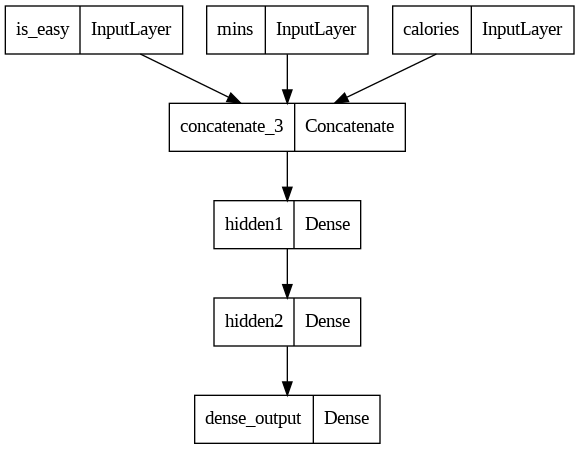

In [143]:
tf.keras.utils.plot_model(dnn_model) #showing the model

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

In [144]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "rating"

validation_split = 0.2

#choosing metrics to optimize on the mean square errors. The model performed

In [145]:
tf.config.run_functions_eagerly(True)

X_train = X_train.loc[:, [
    'is_easy',
    'mins',
    'calories',
]]

history = dnn_model.fit(
    x={name:np.array(value) for name, value in X_train.items()},
    y=np.array(y_train.values),
    batch_size =batch_size,
    epochs=epochs,
    shuffle=True,
    validation_split= 0.2)

#had trouble with getting numbers, dropped na at the beginning of the code in earlier sections
#there are 15 different times the data goes through for training to get better at predictions

Epoch 1/15
1/7 [===>..........................] - ETA: 0s - loss: 56.8120 - mean_squared_error: 15.3473

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 0s 63ms/step - loss: 18.4186 - mean_squared_error: 282.1443 - val_loss: -40.6813 - val_mean_squared_error: 2626.4080
Epoch 2/15
7/7 [==============================] - 0s 45ms/step - loss: -40.8078 - mean_squared_error: 5278.2378 - val_loss: -40.6810 - val_mean_squared_error: 9004.1025
Epoch 3/15
7/7 [==============================] - 0s 45ms/step - loss: -40.8322 - mean_squared_error: 10411.0342 - val_loss: -40.6808 - val_mean_squared_error: 11525.7979
Epoch 4/15
7/7 [==============================] - 0s 44ms/step - loss: -40.8304 - mean_squared_error: 12277.4980 - val_loss: -40.6806 - val_mean_squared_error: 12754.7285
Epoch 5/15
7/7 [==============================] - 0s 48ms/step - loss: -40.8304 - mean_squared_error: 13292.0264 - val_loss: -40.6805 - val_mean_squared_error: 13429.3164
Epoch 6/15
7/7 [==============================] - 0s 48ms/step - loss: -40.8305 - mean_squared_error: 13841.7617 - val_loss: -40.6805 - val_mean_squared_error: 13

In [148]:
epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

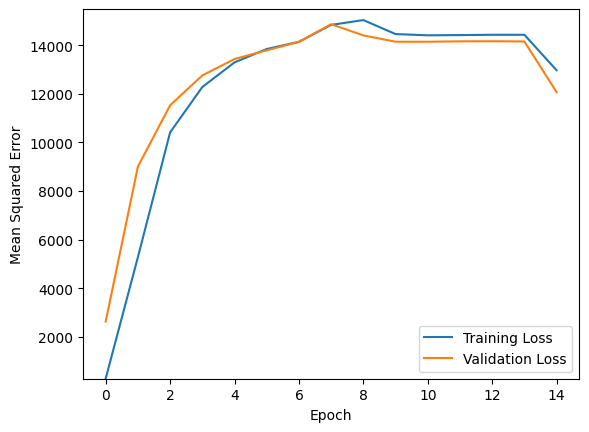

In [149]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

#increasing the training the depth in early stages results in a corresponding improvement in both the train and test sets

-----

# Midterm Submission

To submit this exam, in Canvas navigate to DATA-2000-51 > Assignments > Midterm Exam ([link](https://canvas.jcu.edu/courses/33514/assignments/407120)). You can either upload the `.ipynb` file directly to Canvas, or you can provide a link to the assignment on your GitHub.